### Buurten analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [485]:
# import cbsodata
# gemeente_selectie = ['Houten','Utrecht']
gemeente_selectie = ['Houten']

### Kaart van NL met gemeentes en/of buurten

In [486]:
import ssl
import geopandas as gpd
ssl._create_default_https_context = ssl._create_unverified_context

#### gemeentes

In [456]:
# Retrieve data with municipal boundaries from PDOK
geodata_url = 'https://geodata.nationaalgeoregister.nl/cbsgebiedsindelingen/wfs?request=GetFeature&service=WFS&version=2.0.0&typeName=cbs_gemeente_2022_gegeneraliseerd&outputFormat=json'
municipal_boundaries = gpd.read_file(geodata_url)

URLError: <urlopen error [Errno 8] nodename nor servname provided, or not known>

In [ ]:
ls

buurten_map_analysis.ipynb  prediction_class.ipynb
data_prep.ipynb


In [ ]:
municipal_boundaries.info(verbose=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   id          345 non-null    object  
 1   statcode    345 non-null    object  
 2   statnaam    345 non-null    object  
 3   jrstatcode  345 non-null    object  
 4   rubriek     345 non-null    object  
 5   geometry    345 non-null    geometry
dtypes: geometry(1), object(5)
memory usage: 16.3+ KB


In [ ]:
municipal_boundaries.head()

,id,statcode,statnaam,jrstatcode,rubriek,geometry
0,cbs_gemeente_2022_gegeneraliseerd.1,GM0014,Groningen,2022GM0014,gemeente,"MULTIPOLYGON (((245194.691 592594.007, 245344...."
1,cbs_gemeente_2022_gegeneraliseerd.2,GM0034,Almere,2022GM0034,gemeente,"MULTIPOLYGON (((146891.056 493291.709, 147422...."
2,cbs_gemeente_2022_gegeneraliseerd.3,GM0037,Stadskanaal,2022GM0037,gemeente,"MULTIPOLYGON (((263763.866 566430.392, 263988...."
3,cbs_gemeente_2022_gegeneraliseerd.76,GM0293,Westervoort,2022GM0293,gemeente,"MULTIPOLYGON (((195411.288 439404.042, 195099...."
4,cbs_gemeente_2022_gegeneraliseerd.4,GM0047,Veendam,2022GM0047,gemeente,"MULTIPOLYGON (((256231.909 572319.213, 258595...."


In [ ]:
municipal_boundaries['rubriek'].nunique()

1

In [457]:
municipal_boundaries['statcode'].nunique()

345

<AxesSubplot: >

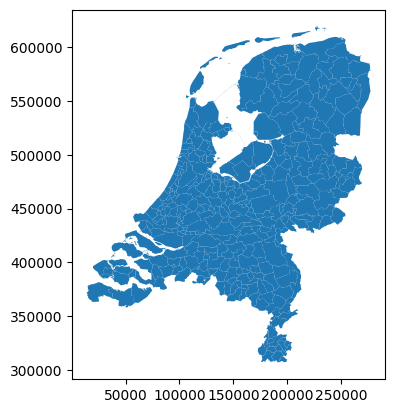

In [458]:
municipal_boundaries.plot()

#### buurten

In [487]:
file_path = '../data/buurt_2020_v3.shp'
# file_path = '../data/wijk_2020_v3.shp'

buurten_map = gpd.read_file(file_path)

In [488]:
gem_map.loc[gem_map['GM_NAAM'] == 'Utrecht', 'WK_CODE'].unique()

array(['WK034401', 'WK034402', 'WK034403', 'WK034404', 'WK034405',
       'WK034406', 'WK034407', 'WK034408', 'WK034409', 'WK034410'],
      dtype=object)

In [489]:
gem_map = buurten_map.loc[buurten_map['GM_NAAM'].isin(gemeente_selectie)]


In [490]:
gem_map.loc[gem_map['GM_NAAM'] == 'Utrecht','BU_NAAM'].unique()

array([], dtype=object)

In [491]:
gem_map = buurten_map.loc[buurten_map['GM_NAAM'].isin(gemeente_selectie)]

drop_buurten_houten = ['Buitengebied Houten West',
       'Buitengebied Houten Oost', "Dorp 't Goy", "'t Goyse Dorp",
       "Buitengebied 't Goy", "'t Waal", 'Tull',
       "Buitengebied Tull en 't Waal", 'Dorp Schalkwijk West',
       'Dorp Schalkwijk Oost', 'Buitengebied Schalkwijk West',
       'Buitengebied Schalkwijk Oost','Bruggen', 'Bogen', 'De Poel',
       'Schepen', 'Boten', 'Honen', 'Kaden', 'Vesten', 'De Staart',
       'Hof van Wulven', 'Rondweg Noord-Oost', 'Rondweg Noord-West',
       'Rondweg Zuid-Oost', 'Rondweg Zuid-West'] 

drop_buurten_utrecht = [
       'Bedrijventerrein Lageweide',
       'Haarzuilens en omgeving',
       'Bedrijventerrein en omgeving',
       'Utrecht Science Park',
              'Bedrijvengebied Strijkviertel', 
              'Bedrijvengebied Papendorp',
              'Rijnenburg',
              'Poldergebied Overvecht' ,
              ]


In [492]:
gem_map = gem_map.loc[~gem_map['BU_NAAM'].isin(drop_buurten_houten)]
gem_map = gem_map.loc[~gem_map['BU_NAAM'].isin(drop_buurten_utrecht)]

<AxesSubplot: >

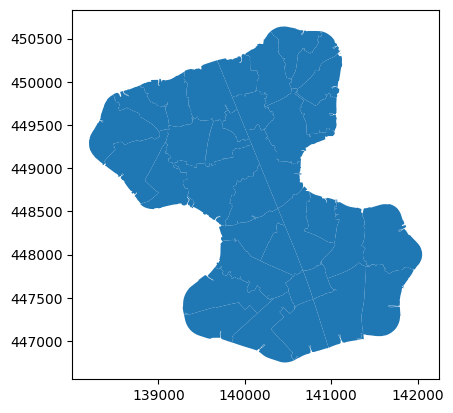

In [493]:
gem_map.plot()

### Plot data op kaart van NL met buurten

In [494]:
totale_dataset = pd.read_excel('../data/kwb-2022.xlsx')
gemeente = totale_dataset.loc[totale_dataset['gm_naam'].isin(gemeente_selectie)]
buurten = gemeente.loc[gemeente['recs'] == 'Buurt']

In [495]:
gemeente['recs'].value_counts()

Buurt       61
Wijk        11
Gemeente     1
Name: recs, dtype: int64

In [496]:
buurten.head()

,gwb_code_10,gwb_code_8,regio,gm_naam,recs,gwb_code,ind_wbi,a_inw,a_man,a_vrouw,...,g_afs_kv,g_afs_sc,g_3km_sc,a_opp_ha,a_lan_ha,a_wat_ha,pst_mvp,pst_dekp,ste_mvs,ste_oad
4482,BU03211010,3211010,Oude Dorp,Houten,Buurt,BU03211010,1,2055,1005,1045,...,.,.,.,43,43,0,3991,1,2,1963
4483,BU03211011,3211011,Oorden,Houten,Buurt,BU03211011,1,965,465,500,...,.,.,.,22,21,1,3991,1,2,2100
4484,BU03211012,3211012,Hoven,Houten,Buurt,BU03211012,1,885,440,445,...,.,.,.,14,14,0,3991,1,2,2416
4485,BU03211013,3211013,Gaarden,Houten,Buurt,BU03211013,1,1320,660,660,...,.,.,.,21,21,0,3992,1,2,1926
4486,BU03211014,3211014,Hoeven,Houten,Buurt,BU03211014,1,1705,850,850,...,.,.,.,29,29,0,3992,2,2,2139


In [497]:
import random
import numpy as np
buurten['score'] = np.random.randint(1, 11, buurten.shape[0])

/var/folders/1r/tdmn3kx53dxffhrmfbsld_4w0000gn/T/ipykernel_38457/844559619.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buurten['score'] = np.random.randint(1, 11, buurten.shape[0])


<AxesSubplot: >

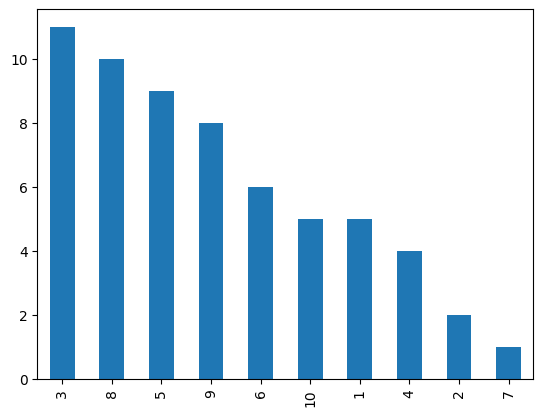

In [498]:
buurten['score'].value_counts().plot(kind='bar')

In [499]:
buurten.head()

,gwb_code_10,gwb_code_8,regio,gm_naam,recs,gwb_code,ind_wbi,a_inw,a_man,a_vrouw,...,g_afs_sc,g_3km_sc,a_opp_ha,a_lan_ha,a_wat_ha,pst_mvp,pst_dekp,ste_mvs,ste_oad,score
4482,BU03211010,3211010,Oude Dorp,Houten,Buurt,BU03211010,1,2055,1005,1045,...,.,.,43,43,0,3991,1,2,1963,3
4483,BU03211011,3211011,Oorden,Houten,Buurt,BU03211011,1,965,465,500,...,.,.,22,21,1,3991,1,2,2100,4
4484,BU03211012,3211012,Hoven,Houten,Buurt,BU03211012,1,885,440,445,...,.,.,14,14,0,3991,1,2,2416,5
4485,BU03211013,3211013,Gaarden,Houten,Buurt,BU03211013,1,1320,660,660,...,.,.,21,21,0,3992,1,2,1926,8
4486,BU03211014,3211014,Hoeven,Houten,Buurt,BU03211014,1,1705,850,850,...,.,.,29,29,0,3992,2,2,2139,9


In [500]:
score = buurten[['score', 'gwb_code_10']]

#  Koppel data 
score_per_gemeente = pd.merge(gem_map, score,
                           left_on = "BU_CODE", 
                           right_on = "gwb_code_10")

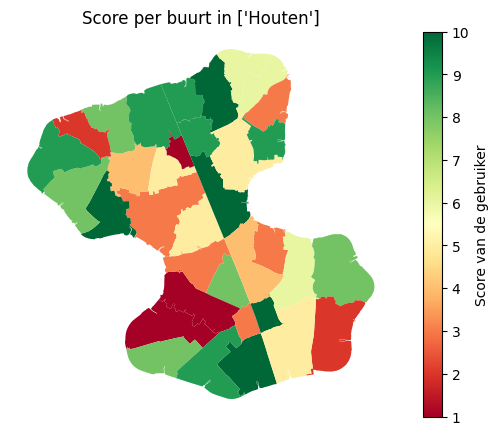

In [501]:
# Maak een thematische kaart
p = score_per_gemeente.plot(column='score', 
                         figsize = (8,5),
                         cmap='RdYlGn',
                         legend=True,
                         legend_kwds={'label': "Score van de gebruiker",
                                'orientation': "vertical"})
p.axis('off')

p.set_title(f'Score per buurt in {gemeente_selectie}')
plt.show()

#### X-variabele defineren om buurt-score te voorspellen

In [502]:
buurten.head()

,gwb_code_10,gwb_code_8,regio,gm_naam,recs,gwb_code,ind_wbi,a_inw,a_man,a_vrouw,...,g_afs_sc,g_3km_sc,a_opp_ha,a_lan_ha,a_wat_ha,pst_mvp,pst_dekp,ste_mvs,ste_oad,score
4482,BU03211010,3211010,Oude Dorp,Houten,Buurt,BU03211010,1,2055,1005,1045,...,.,.,43,43,0,3991,1,2,1963,3
4483,BU03211011,3211011,Oorden,Houten,Buurt,BU03211011,1,965,465,500,...,.,.,22,21,1,3991,1,2,2100,4
4484,BU03211012,3211012,Hoven,Houten,Buurt,BU03211012,1,885,440,445,...,.,.,14,14,0,3991,1,2,2416,5
4485,BU03211013,3211013,Gaarden,Houten,Buurt,BU03211013,1,1320,660,660,...,.,.,21,21,0,3992,1,2,1926,8
4486,BU03211014,3211014,Hoeven,Houten,Buurt,BU03211014,1,1705,850,850,...,.,.,29,29,0,3992,2,2,2139,9


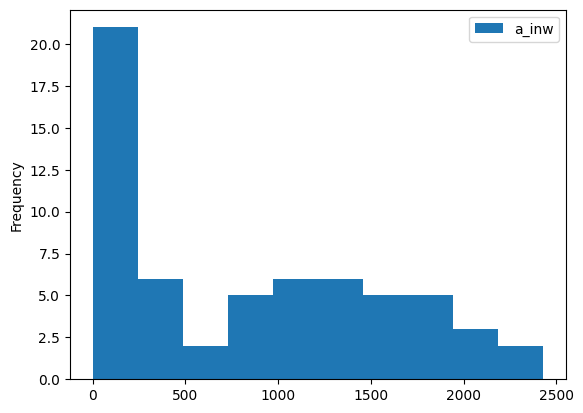

In [503]:
## aantal inwoners
aantal_inwoners = buurten[['gwb_code_10', 'a_inw']]
aantal_inwoners.plot(kind='hist')
plt.show()

In [504]:
def create_plot_var(input_df: pd.DataFrame, map_df: pd.DataFrame, key: str, value: str):

       item = input_df[['gwb_code_10', value]]

       score_per_buurt =  pd.merge(map_df, item,
                     left_on = "BU_CODE", 
                     right_on = "gwb_code_10")

       # Maak een thematische kaart
       p = score_per_buurt.plot(column=value, 
                            figsize = (6,4),
                            cmap='RdYlGn',
                            # legend=True,
                            # legend_kwds={'label': "Score van de gebruiker",
                            #        'orientation': "vertical"}
                            )
       p.axis('off')
       p.set_title(f'Score per buurt in {gemeente_selectie} voor de volgende variabele: {key}')
       plt.show()

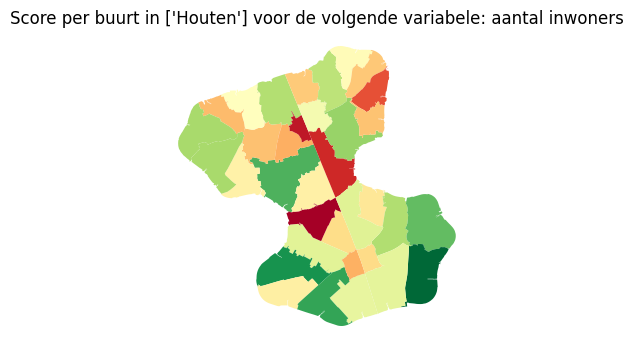

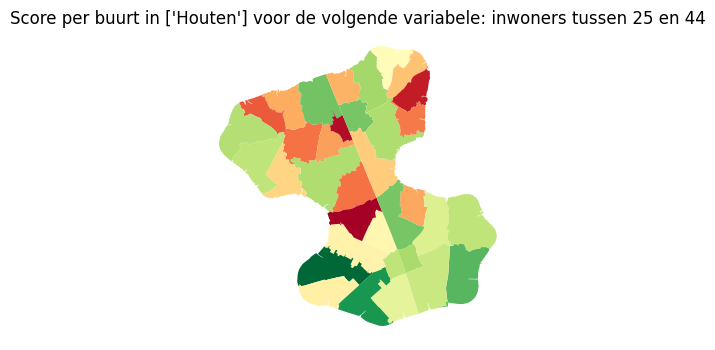

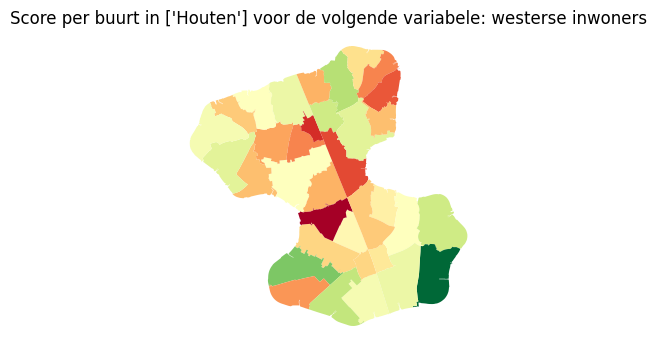

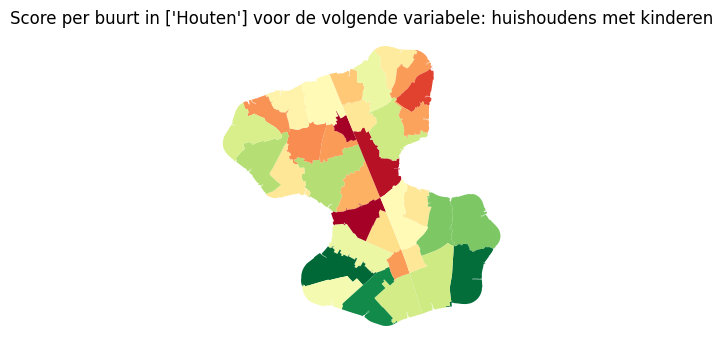

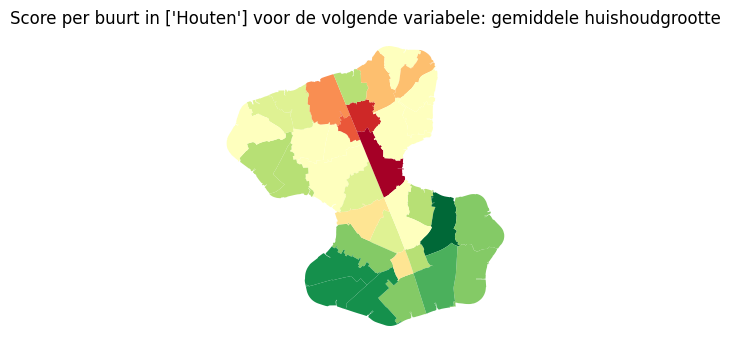

In [505]:
# populatie
populatie_variabelen = {
    'aantal inwoners': 'a_inw',
    'inwoners tussen 25 en 44':'a_25_44',
    'westerse inwoners': 'a_w_all',
    'huishoudens met kinderen': 'a_hh_m_k',
    'gemiddele huishoudgrootte': 'g_hhgro', 
    }

# plot values
for key, value in populatie_variabelen.items():
    create_plot_var(buurten, gem_map, key, value)

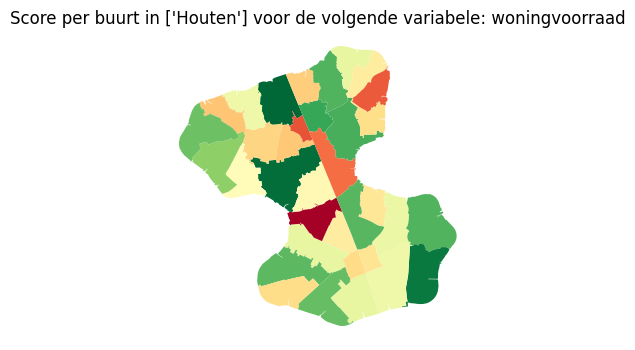

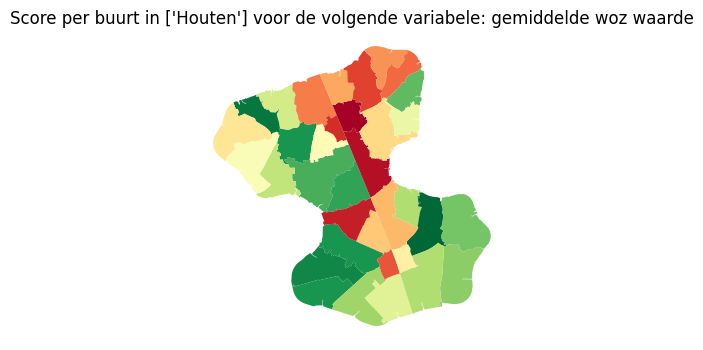

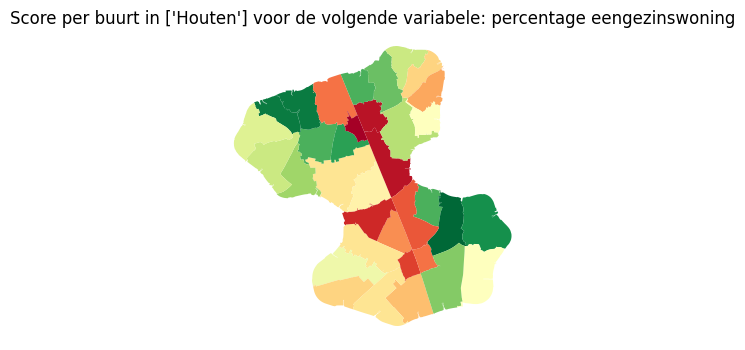

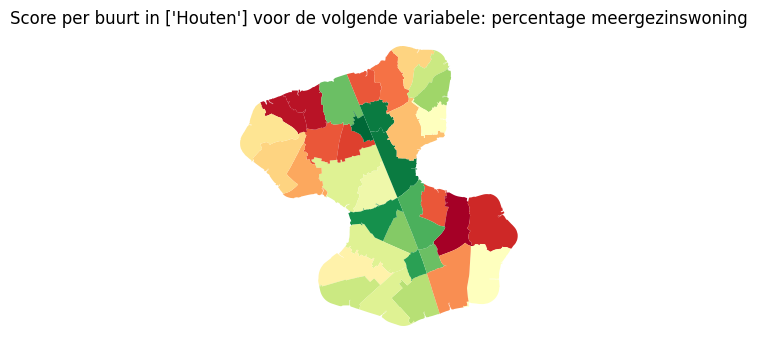

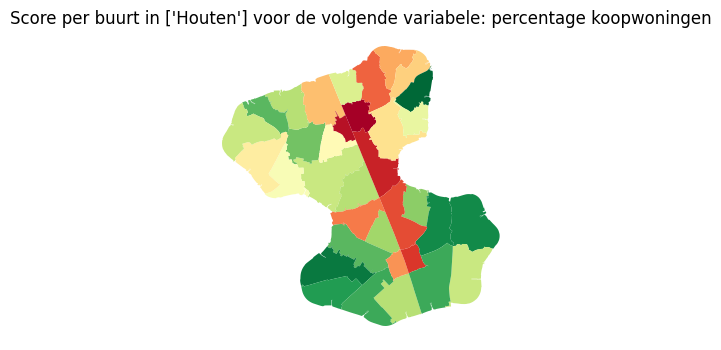

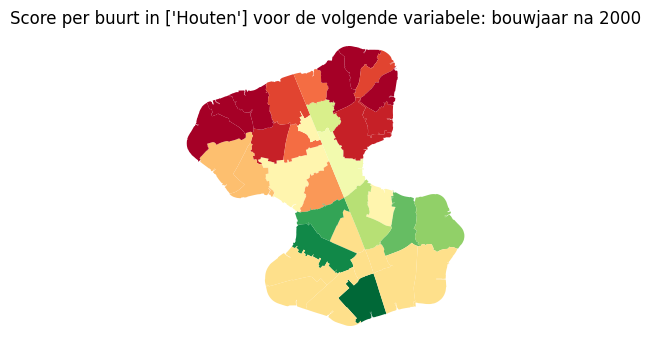

In [506]:
# wonen
wonen_variabelen = {
    'woningvoorraad': 'a_woning',
    'gemiddelde woz waarde':'g_woz',
    'percentage eengezinswoning': 'p_1gezw',
    'percentage meergezinswoning': 'p_mgezw',
    'percentage koopwoningen': 'p_koopw', 
    'bouwjaar na 2000': 'p_bjo2k'}

# plot values
for key, value in wonen_variabelen.items():
    create_plot_var(buurten, gem_map, key, value)

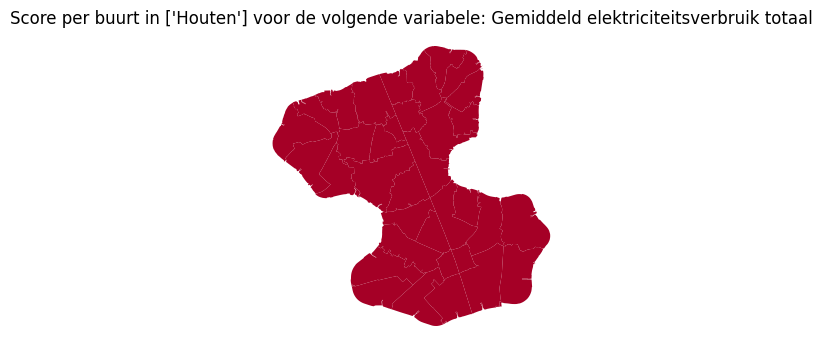

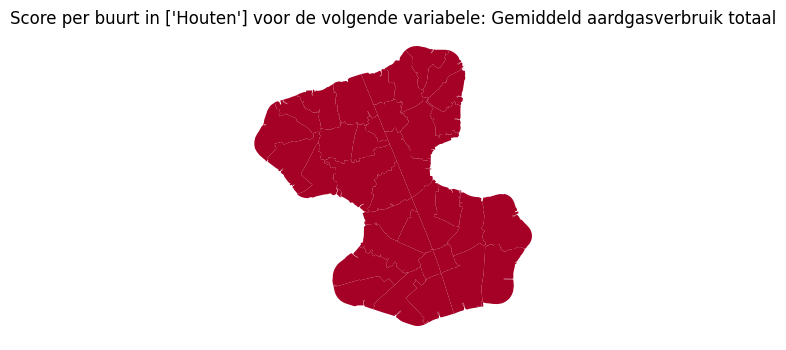

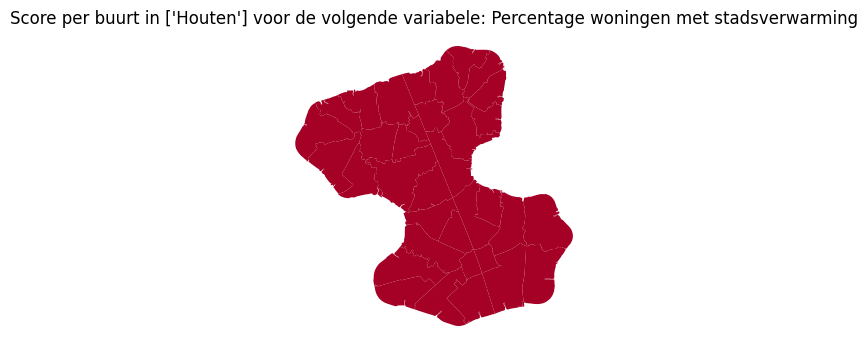

In [507]:
# energieverbruikt
energie_variabelen = {
    'Gemiddeld elektriciteitsverbruik totaal': 'g_ele',
    'Gemiddeld aardgasverbruik totaal':'g_gas',
    'Percentage woningen met stadsverwarming':'p_stadsv'
    }

# plot values
for key, value in energie_variabelen.items():
    create_plot_var(buurten, gem_map, key, value)

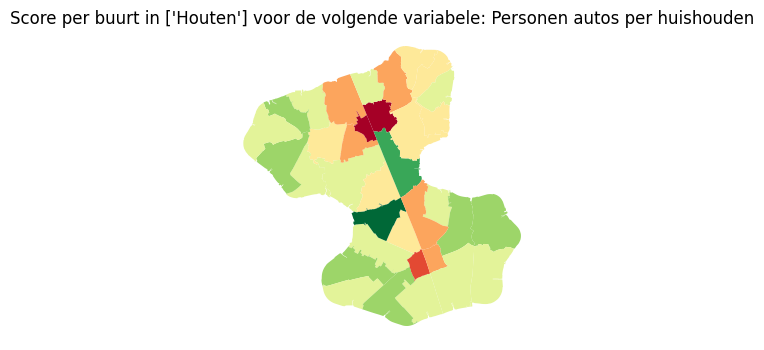

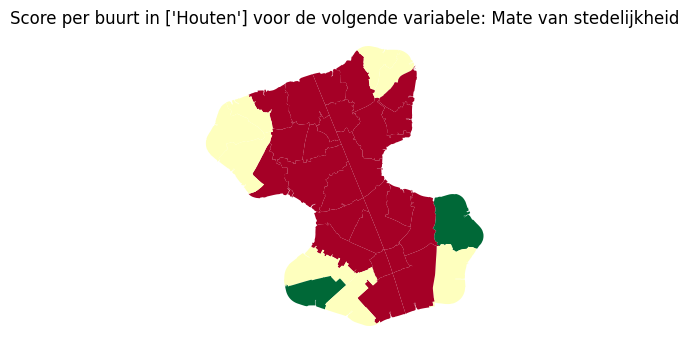

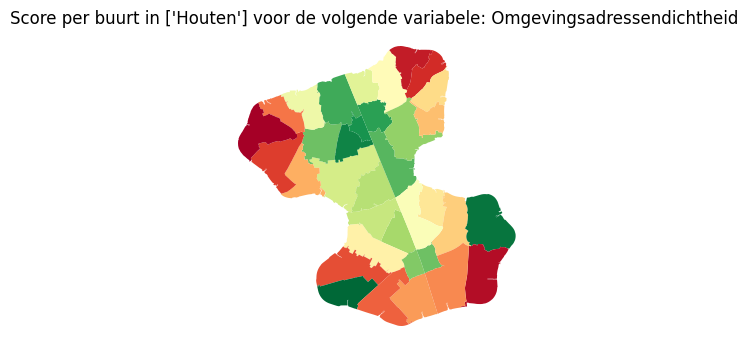

In [508]:
# energieverbruikt
extra_variabelen = {
    'Personen autos per huishouden': 'g_pau_hh',
    'Mate van stedelijkheid':'ste_mvs',
    'Omgevingsadressendichtheid ':'ste_oad'
    }

# plot values
for key, value in extra_variabelen.items():
    create_plot_var(buurten, gem_map, key, value)

In [509]:
## TO DO: add new variables and create scores + model?

In [432]:
## groen
## parkeergelegenheid
## type huis
## supermarkt
## jonge mensen/gezinnen/starters
## brede straten
## jaren 30 of nieuwbouw